In [87]:
import pandas as pd  #Manipular database
import matplotlib.pyplot as plt  #Visualização de dados
from sklearn.model_selection import train_test_split  #Divisor database
from sklearn.naive_bayes import GaussianNB  #Classificador 
from sklearn import metrics  #Acurácia dos resultados
import time
import random
import seaborn as sns
from PIL import Image

In [88]:
dataset = pd.read_excel("mushroom _data.xlsx")
dataset

,classe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [89]:
datasetEx = pd.read_excel("mushroomEx_data.xlsx")
datasetEx

,classe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


### Probablidade do cogumelo ser tóxico

In [97]:
fieldQtd = [0, 0]
values = list(datasetEx['classe'].values)  #Guarda em uma lista os valores da classe seleconada

fieldNames = ['edible', 'poisonous']

for x in values:
  if x == 'EDIBLE': 
    fieldQtd[0]+=1;
  elif x == 'POISONOUS':
    fieldQtd[1]+=1;

#Exibindo valores
print('total:',len(values))
print('edible:',fieldQtd[0])
print('poisonous:',fieldQtd[1])
P_poisonous = fieldQtd[1] / len(values)
print('P_poisonous:', round(P_poisonous, 2)*100,'%')




total: 8416
edible: 4488
poisonous: 3928
P_poisonous: 47.0 %


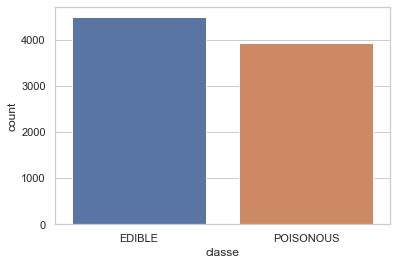

In [98]:
sns.set_theme(style="whitegrid")
sns.countplot(x='classe', data=datasetEx,) 
plt.show()

### Formato da tampa

8416


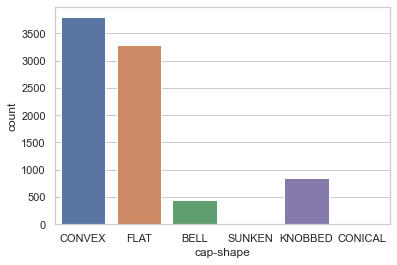

In [91]:
colors = ['steelblue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lightcoral']
values = []

fieldQtd = [0, 0, 0, 0, 0, 0]
values = list(datasetEx['cap-shape'].values)  #Guarda em uma lista os valores da classe seleconada

fieldNames = ['bell', 'conical', 'convex', 'flat','knobbed','sunken']
print(len(values))
for x in values:
  if x == 'BELL': 
    fieldQtd[0]+=1;
  elif x == 'CONICAL':
    fieldQtd[1]+=1;
  elif x == 'CONVEX':
    fieldQtd[2]+=1;
  elif x == 'FLAT':
    fieldQtd[3]+=1;
  elif x == 'KNOBBED':
    fieldQtd[4]+=1;
  elif x == 'SUNKEN':
    fieldQtd[5]+=1;


sns.countplot(x='cap-shape', data=datasetEx, ) 
plt.show()

In [92]:
fieldQtd[0];
print('bell:',fieldQtd[0]);
print('conical:',fieldQtd[1]);
print('convex:',fieldQtd[2]);
print('flat:',fieldQtd[3]);
print('knobbed:',fieldQtd[4]);
print('sunken:',fieldQtd[5]);

bell: 452
conical: 4
convex: 3796
flat: 3292
knobbed: 840
sunken: 32


### Probabilidade da tampa do cogumelo ser convexa

Dessa forma podemos calcular a probabilidade de, por exemplo, a tampa do cogumelo ter formato convexo. Para isso, basta pegarmos a quantidade de casos: 3796 e dividir pelo número total de registros: 8416.

In [93]:
P_convex = 3796 / 8416
print('P_convex:',round(P_convex*100, 1),'%')

P_convex: 45.1 %


Estamos interessados em descobrir a probabilidade de um cogumelo ser toxico, dado que sua tampa tem formato convexo. Para isso usaremos o teorema de Bayes. P_toxico/convexo = (P_convexo/toxico * P_toxico) / P_convexo

### Probabilidade condicionada de um cogumelo ter tampa convexa quando for toxico

Total de amostras: 8416
Probabilidade condicionada de um cogumelo ter tampa convexa quando for toxico 44.0 %


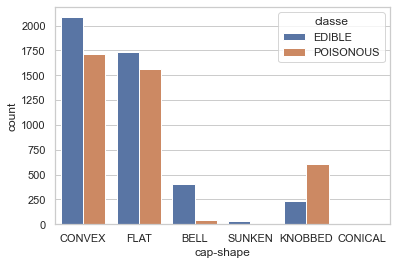

In [95]:
from attr import field


fieldQtd = [0, 0, 0, 0, 0, 0]
valuesShape = list(datasetEx['cap-shape'].values) 
valuesClasse = list(datasetEx['classe'].values)
fieldNames = ['bell', 'conical', 'convex', 'flat','knobbed','sunken']

for x, y in zip(valuesShape, valuesClasse):
  if x == 'BELL' and y == 'POISONOUS' : 
    fieldQtd[0]+=1;
  elif x == 'CONICAL' and y == 'POISONOUS':
    fieldQtd[1]+=1;
  elif x == 'CONVEX' and y == 'POISONOUS':
    fieldQtd[2]+=1;
  elif x == 'FLAT' and y == 'POISONOUS':
    fieldQtd[3]+=1;
  elif x == 'KNOBBED' and y == 'POISONOUS':
    fieldQtd[4]+=1;
  elif x == 'SUNKEN' and y == 'POISONOUS':
    fieldQtd[5]+=1;

amostrasQtd = len(values)
print('Total de amostras:',amostrasQtd)
P_convexPoisonous = fieldQtd[2] / 3928
print('Probabilidade condicionada de um cogumelo ter tampa convexa quando for toxico', round(P_convexPoisonous,2)*100,'%')

#Exibindo gráficamente
sns.countplot(x='cap-shape', data=datasetEx, hue='classe') 
plt.show()

### Probabilidade condicionada de um cogumelo ser toxico quando  ter tampa convexa

In [96]:
P_poisonousConvex = (P_convexPoisonous * P_poisonous) / P_convex
print(round(P_poisonousConvex,2)*100,'%')

45.0 %
